<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта</a></span><ul class="toc-item"><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Описание данных</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Обучение-модели-при-дисбалансе-классов" data-toc-modified-id="Обучение-модели-при-дисбалансе-классов-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Обучение модели при дисбалансе классов</a></span><ul class="toc-item"><li><span><a href="#DecisionTreeClassifier" data-toc-modified-id="DecisionTreeClassifier-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>DecisionTreeClassifier</a></span></li><li><span><a href="#RandomForestClassifier" data-toc-modified-id="RandomForestClassifier-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>RandomForestClassifier</a></span></li><li><span><a href="#LogisticRegression" data-toc-modified-id="LogisticRegression-4.1.3"><span class="toc-item-num">4.1.3&nbsp;&nbsp;</span>LogisticRegression</a></span></li></ul></li></ul></li><li><span><a href="#Проверка-модели-на-адекватность" data-toc-modified-id="Проверка-модели-на-адекватность-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка модели на адекватность</a></span><ul class="toc-item"><li><span><a href="#Метрики--модели-с-дисбалансом" data-toc-modified-id="Метрики--модели-с-дисбалансом-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Метрики  модели с дисбалансом</a></span></li><li><span><a href="#Балансирование-классов" data-toc-modified-id="Балансирование-классов-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Балансирование классов</a></span><ul class="toc-item"><li><span><a href="#SMOTE" data-toc-modified-id="SMOTE-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>SMOTE</a></span></li><li><span><a href="#downsampling" data-toc-modified-id="downsampling-5.2.2"><span class="toc-item-num">5.2.2&nbsp;&nbsp;</span>downsampling</a></span></li><li><span><a href="#upsampling" data-toc-modified-id="upsampling-5.2.3"><span class="toc-item-num">5.2.3&nbsp;&nbsp;</span>upsampling</a></span></li></ul></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

## Описание проекта

Цель проекта

На основании исторических данных о поведении клиентов и расторжении договоров с банком обучить модель, предсказывающую уход клиента из банка в ближайшее время со значением F1-меры не менее 0.59.

Источник данных: https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling

Задачи проекта:
1. Провести предобработку данных
2. Подготовить данные для обучения модели
3. Определить способ оценки эффективности моделей
4. Подборать оптимальную модель для решения задачи классификации
4. Подборать наилучшие гиперпараметры
5. Протестировать модель на валидационной и тестовой выборках
6. Проверить наиболее успешную модель на адекватность 

### Описание данных

Признаки:

`CustomerId` — уникальный идентификатор клиента

`Surname` — фамилия

`CreditScore` — кредитный рейтинг

`Geography` — страна проживания

`Gender` — пол

`Age` — возраст

`Tenure` — сколько лет человек является клиентом банка

`Balance` — баланс на счёте

`NumOfProducts` — количество продуктов банка, используемых клиентом

`HasCrCard` — наличие кредитной карты

`IsActiveMember` — активность клиента

`EstimatedSalary` — предполагаемая зарплата

Целевой признак:

`Exited` — факт ухода клиента

## Исследовательский анализ данных

In [86]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns 
import pylab

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder 

from imblearn.over_sampling import SMOTE
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from tqdm import tqdm
import snakecase

In [87]:
try:
    df = pd.read_csv('/datasets/Churn.csv')
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/Churn.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


Для удобства дальнейшей работы со столбцами приводим их названия к нижнему регистру.

In [88]:
df.columns = pd.Series(df.columns).apply(lambda x: snakecase.convert(x))
df.columns

Index(['row_number', 'customer_id', 'surname', 'credit_score', 'geography',
       'gender', 'age', 'tenure', 'balance', 'num_of_products', 'has_cr_card',
       'is_active_member', 'estimated_salary', 'exited'],
      dtype='object')

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   row_number        10000 non-null  int64  
 1   customer_id       10000 non-null  int64  
 2   surname           10000 non-null  object 
 3   credit_score      10000 non-null  int64  
 4   geography         10000 non-null  object 
 5   gender            10000 non-null  object 
 6   age               10000 non-null  int64  
 7   tenure            9091 non-null   float64
 8   balance           10000 non-null  float64
 9   num_of_products   10000 non-null  int64  
 10  has_cr_card       10000 non-null  int64  
 11  is_active_member  10000 non-null  int64  
 12  estimated_salary  10000 non-null  float64
 13  exited            10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [90]:
# в столбце tenure есть пропуски
df.tenure.isna().sum()

909

In [91]:
# дубликаты отсутствуют
df.duplicated().sum()

0

In [92]:
is_num = ['credit_score', 'age', 'tenure', 'balance', 'estimated_salary']

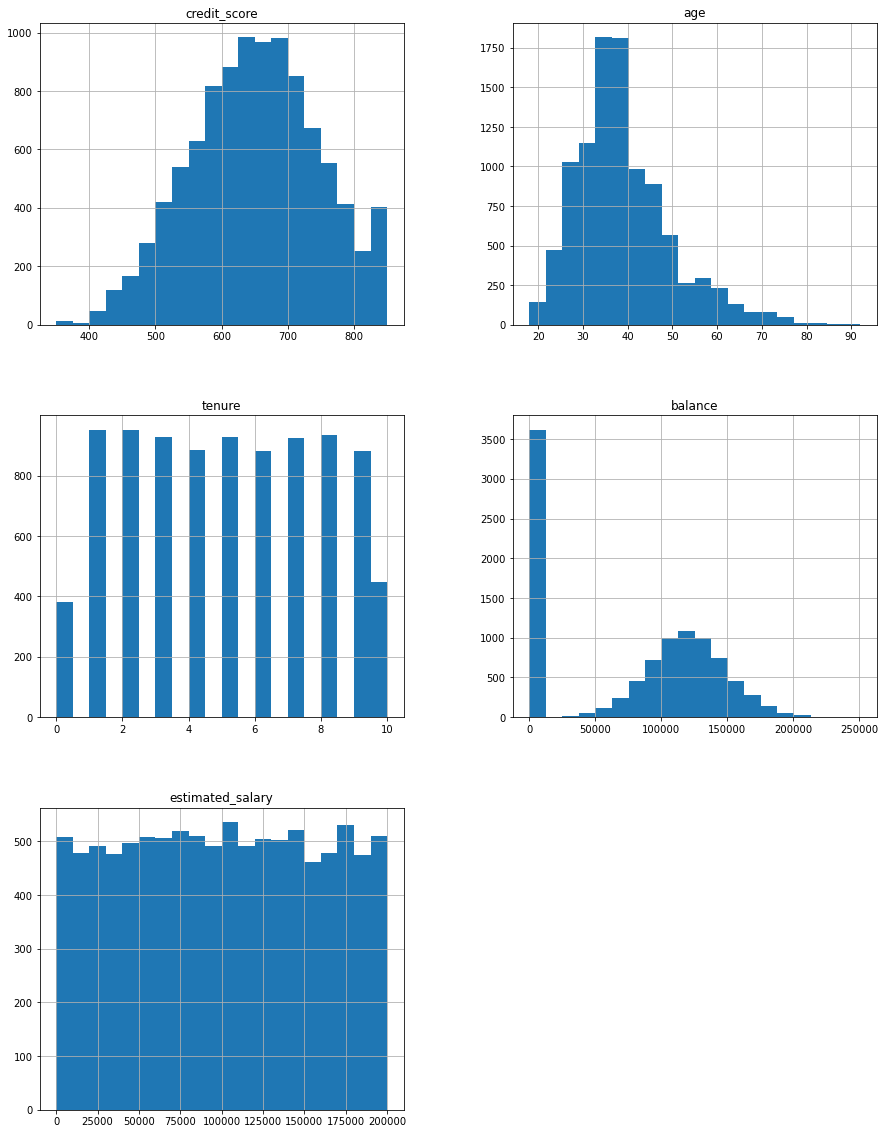

In [93]:
# общая гистограмма для всех количественных столбцов таблицы
df[is_num].hist(figsize=(15, 20), bins=20)
plt.show()

Кредитный рейтинг и возраст клиентов имеют близкое к нормальному распределение. Длительность пользования услугами  и предполагаемая зарплата клиентов распределены равномерно. Более трети клиентов (примерно 3.3 тысячи) имеют на балансе менее 10.000 у.е. (вероятно, евро).

In [94]:
# описательные статистики по числовым признакам
df[is_num].describe()[1:-1]

,credit_score,age,tenure,balance,estimated_salary
mean,650.528800,38.921800,4.997690,76485.889288,100090.239881
std,96.653299,10.487806,2.894723,62397.405202,57510.492818
min,350.000000,18.000000,0.000000,0.000000,11.580000
25%,584.000000,32.000000,2.000000,0.000000,51002.110000
50%,652.000000,37.000000,5.000000,97198.540000,100193.915000
75%,718.000000,44.000000,7.000000,127644.240000,149388.247500


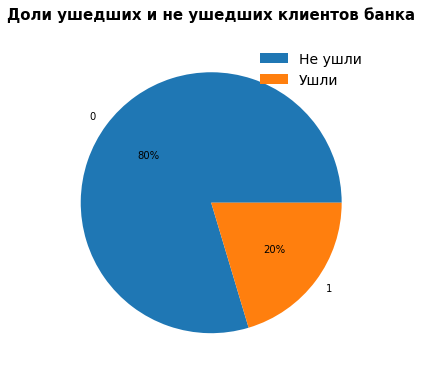

In [95]:
# Доли ушедших и не ушедших клиентов банка среди всех клиентов банка
df.exited.value_counts(normalize=True)\
    .plot(kind='pie', autopct='%1.0f%%', figsize=(6, 6))
plt.title('Доли ушедших и не ушедших клиентов банка', pad=20, weight='bold', size=15 )
plt.ylabel('')
plt.legend(['Не ушли', 'Ушли'], frameon=False, fontsize=14)
plt.show()

В общем случае без разделения по категориям за один цикл банк потерял 20% клиентов.

*В описании данных нет информации о длительности "цикла", по данным которого будет прогнозироваться вероятность оттока клиентов.*

На графиках ниже будет показано:

- слева - распределение всех клиентов (и ушедших, и оставшихся за цикл) по, в основном, категориальному параметру (страна, гендер клиента и т.п.) в % (за 100% взято общее количество всех клиентов - 10тыс. чел.)

- справа - доли только **ушедших из банка** клиентов за последний цикл сгруппированных по признаку (за 100% взято количество всех клиентов с одинаковым признаком, например, только клиенты из Франции; каждый бар - доля клиентов только из Франции, которые ушли из банка за последний цикл).

Графики строятся по всем имеющимся данным, в том числе по клиентами, у которых отсутствует запись в графе "tenure" (длительность пользования услугами банка), которые для обучения моделей будут удалены, т.к. это абсолютно валидные записи реальных клиентов.

Распределение пользователей (в %) по признаку geography


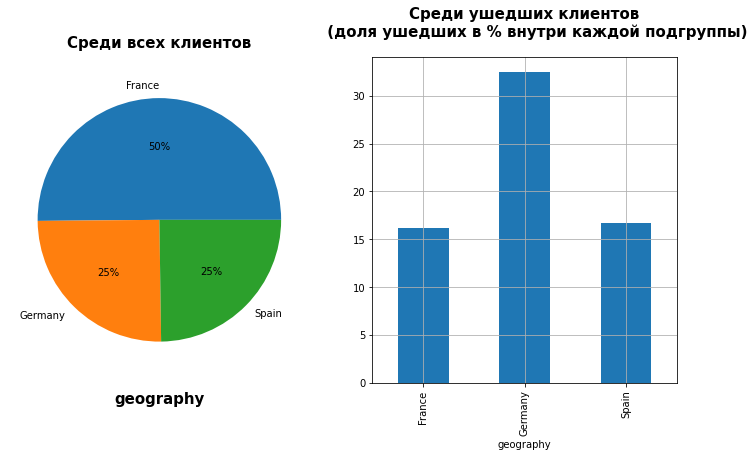

Распределение пользователей (в %) по признаку gender


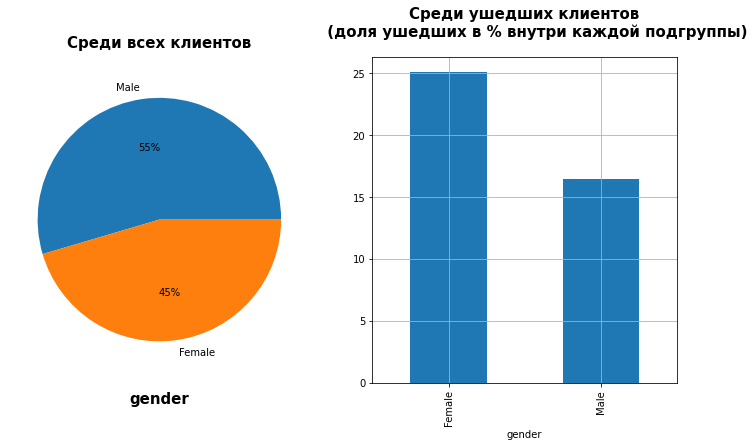

Распределение пользователей (в %) по признаку has_cr_card


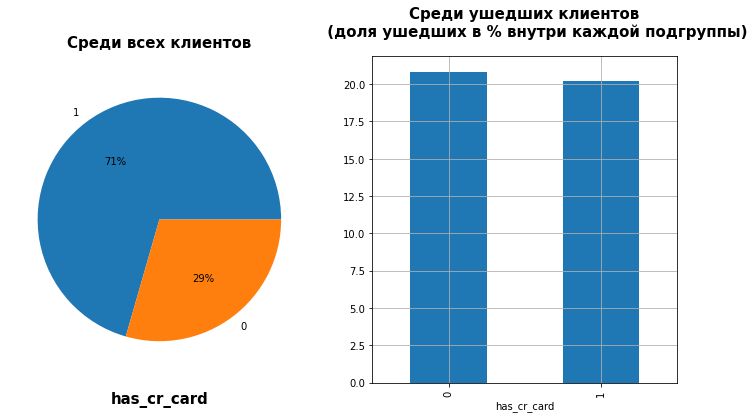

Распределение пользователей (в %) по признаку is_active_member


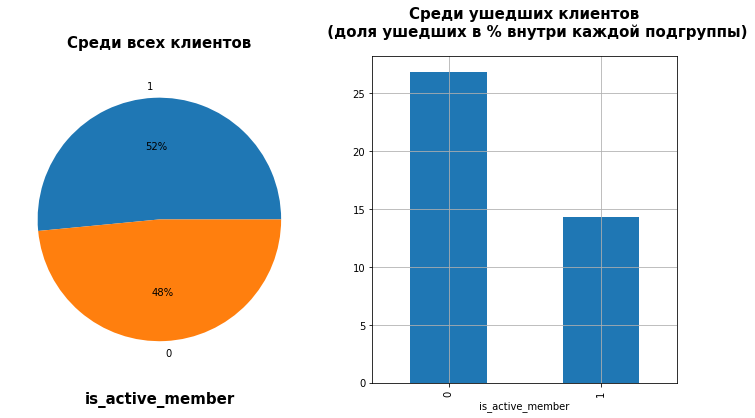

Распределение пользователей (в %) по признаку num_of_products


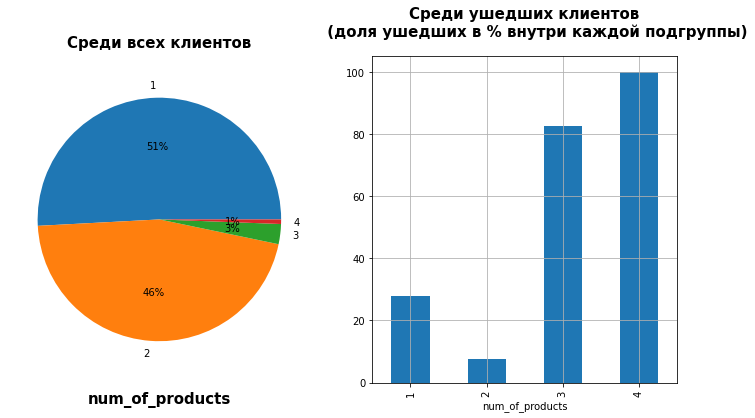

In [96]:
# категориальные признаки
categorical = ['geography', 'gender', 'has_cr_card', 'is_active_member', 'num_of_products']

# распределения пользователей по геогафии, гендеру,
# наличию кредитной карты, принадлежности к "активным клиентам" и количеству продуктов банка
for col in categorical:
    print(f'Распределение пользователей (в %) по признаку {col}')
    pylab.subplot (1, 2, 1)
    df[col].value_counts(normalize=True)\
    .plot(kind='pie', autopct='%1.0f%%', figsize=(12, 6))
    plt.title("Среди всех клиентов", pad=20, weight='bold', size=15)
    plt.xlabel(col, labelpad=20, weight='bold', size=15)
    plt.ylabel('')
    pylab.subplot (1, 2, 2) 
    ((df[df.exited == 1].groupby(by=col)['age'].count()/
     df.groupby(by=col)['age'].count())*100)\
    .plot(kind='bar', grid=True)
    plt.title("Среди ушедших клиентов\n \
    (доля ушедших в % внутри каждой подгруппы)", pad=20, weight='bold', size=15)
   
    plt.show()


Доли оттока клиентов распределены внутри практически всех признаков неравномерно.

В Германии банк потерял каждого третьего клиента (32%) за последний цикл. Это может быть вызвано либо неэффективной работотй банка именно в Германии, либо внутристрановой спецификой.

Женщины прекращают отношения с банком чаще мужчин (25% и 16%  соответственно).

Наличие кредитной карты на отток никак не влияет.

Активные клиенты (15%) ожидаемо реже уходят из банка, чем неактивные клиенты (27%).

Клиенты, пользующиеся 4-мя продуктами банка покинули банк абсолютно все (хотя это примерно 1% или 100 человек). Похожая ситуация и с пользователями суммарно 3х продуктов банка - 83% перестали быть клиентами. Самыми стабильными оказались обладатели 2-х продуктов банка - более 90% из них остались клиентами банка.

## Предобработка данных

In [97]:
# удаляем неинформативные столбцы с "персональными данными" (фамилия и ID) и номерами строк
df.drop(['row_number', 'customer_id', 'surname'], axis=1, inplace=True)
df.head()

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [98]:
# Клиенты банка, которые пользуются его услугами менее года (т.е. 0 лет) 
# имеют в столбце 'tenure' значение 0.0. Т.е. пропуски в данных скорее всего не означают 
# нулевой срок пользования услугами банка в годах. Можно было бы предположить, 
# что это люди с "клиентским" стажем более 10 лет, но никаких пояснеий по этому поводу 
# в описании данных нет. Поэтому логичнее будет просто удалить эту часть данных с пропусками.
df.tenure.value_counts(dropna=False)

1.0     952
2.0     950
8.0     933
3.0     928
5.0     927
7.0     925
NaN     909
4.0     885
9.0     882
6.0     881
10.0    446
0.0     382
Name: tenure, dtype: int64

In [99]:
# Распределение лояльных и ушедших клиентов в данных с пропусками такое же (80%/20%), как и
# среди всех данных. Значит, удаление пропусков никак не повлияет на распределение клиентов
# по лояльности и обучение модели в дальнейшем.
df[df.tenure.isna()].exited.value_counts(normalize=True)

0    0.79868
1    0.20132
Name: exited, dtype: float64

In [100]:
# удаляем строки с пропусками в признаке 'tenure'
df.dropna(axis=0, inplace=True)
df.tenure.isna().sum()

0

In [101]:
# перезаписываем индексы после удаления пропусков
df = df.reset_index(drop=True)
df.tail()

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
9086,800,France,Female,29,2.0,0.00,2,0,0,167773.55,0
9087,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9088,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9089,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9090,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


In [102]:
# приводим значения tenure к типу integer
df.tenure = df.tenure.astype(int)
df.tenure.unique()

array([ 2,  1,  8,  7,  4,  6,  3, 10,  5,  9,  0])

In [103]:
# приводим значения balance к типу integer
df.balance = df.balance.astype(int)
df.balance[:5]

0         0
1     83807
2    159660
3         0
4    125510
Name: balance, dtype: int64

In [104]:
# приводим значения estimatedsalary к типу integer
df.estimated_salary = df.estimated_salary.astype(int)
df.estimated_salary[:5]

0    101348
1    112542
2    113931
3     93826
4     79084
Name: estimated_salary, dtype: int64

## Подготовка данных

In [105]:
# преобразовываем категориальные признаки техникой One Hot Encoding
ohe = OneHotEncoder(drop='first').fit(df[['gender', 'geography']])
print(ohe.categories_)

[array(['Female', 'Male'], dtype=object), array(['France', 'Germany', 'Spain'], dtype=object)]


In [106]:
# новый массив для трансформации
df_ohe = df.copy(deep=True)
categorical = ohe.transform(df_ohe[['gender', 'geography']]).toarray()

# имена новых колонок с учетом сброса первой колонки
categorical = pd.DataFrame(data = categorical,
                           columns=['gender_Male', 'geography_Germany', 'geography_Spain'])

# удаляем категориальные столбцы
df_ohe.drop(['gender', 'geography'], axis=1, inplace=True)
df_ohe = pd.concat([df_ohe, categorical],axis = 1)
df_ohe.tail()

# выведены именно последние строки датасета, чтобы было видно, что индексы совпадают 

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,gender_Male,geography_Germany,geography_Spain
9086,800,29,2,0,2,0,0,167773,0,0.0,0.0,0.0
9087,771,39,5,0,2,1,0,96270,0,1.0,0.0,0.0
9088,516,35,10,57369,1,1,1,101699,0,1.0,0.0,0.0
9089,709,36,7,0,1,0,1,42085,1,0.0,0.0,0.0
9090,772,42,3,75075,2,1,0,92888,1,1.0,1.0,0.0


In [107]:
# сплит на датафрейм без целевого признака (features) и целевой признак (target)
features = df_ohe.drop(['exited'], axis=1)
target = df_ohe['exited']

# сплит на обучающую(60%), валидационную(20%) и тестовую (20%) выборки 
x_train, x_test, y_train, y_test = train_test_split(
    features, target, test_size=0.20, random_state=100, stratify=target)
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.25, random_state=100, stratify=y_train)

# количества наблюдений в каждой из выборок
for i in [x_train, y_train, x_val, y_val, x_test, y_test]:
    print(i.shape[0])

5454
5454
1818
1818
1819
1819


In [108]:
# масштабирование данных стандартизацией
pd.options.mode.chained_assignment = None

# определяем числовые столбцы для масштабирования

numeric = ['credit_score', 'age', 'tenure', 'balance', 'num_of_products', 'estimated_salary']
scaler = StandardScaler()

# обучаем скалер на тренировочной выборке 
scaler.fit(x_train[numeric])

# масштабируем все выборки
x_train[numeric] = scaler.transform(x_train[numeric])
x_val[numeric] = scaler.transform(x_val[numeric])
x_test[numeric] = scaler.transform(x_test[numeric])

# обновленные выборки
for i in [x_train, x_val, x_test]:
    print(i.head())

      credit_score       age    tenure   balance  num_of_products  \
4475     -1.517991  0.369477  0.353641  0.811368        -0.910521   
4400      0.379465 -0.385005 -0.687056 -1.226719         0.823411   
4498     -1.413735  0.086546 -1.727754  0.529185        -0.910521   
8995      1.182235  0.086546  1.394339  0.383925        -0.910521   
8075      0.306486 -0.667935  0.006742 -1.226719        -0.910521   

      has_cr_card  is_active_member  estimated_salary  gender_Male  \
4475            0                 0          0.637331          1.0   
4400            1                 1          1.309049          1.0   
4498            1                 1          1.134922          1.0   
8995            1                 0          0.404644          0.0   
8075            1                 1          0.863955          0.0   

      geography_Germany  geography_Spain  
4475                1.0              0.0  
4400                0.0              1.0  
4498                0.0            

### Обучение модели при дисбалансе классов 

#### DecisionTreeClassifier

In [109]:
# функция для печати отчета о работе модели
is_na = 0

def get_report(
    model_name=is_na, 
    best_f1=is_na, 
    best_result=is_na, 
    best_depth=is_na, 
    best_est=is_na):
    print('Алгоритм:', model_name)
    print('Максимальная F1-мера: {:.2f}'.format(best_f1))
    print('Самая высокая точность: {:.2%}'.format(best_result))
    print('Самое удачное число деревьев: {:.0f}'.format(best_est)) 
    print('Самая удачная максимальная глубина: {:.0f}'.format(best_depth))

Поиск наиболее удачной максимальной глубины (max_depth) в диапазоне от 1 до 30 для дерева решений.

Успешность модели здесь и в дальнейшем измеряется значением F1-меры (по заданию ЯП) на валидационной выборке. 

График долей правильных ответов модели (метрика accuracy_score) построен для визуализации изменения работы модели при изменении гиперпараметров. 

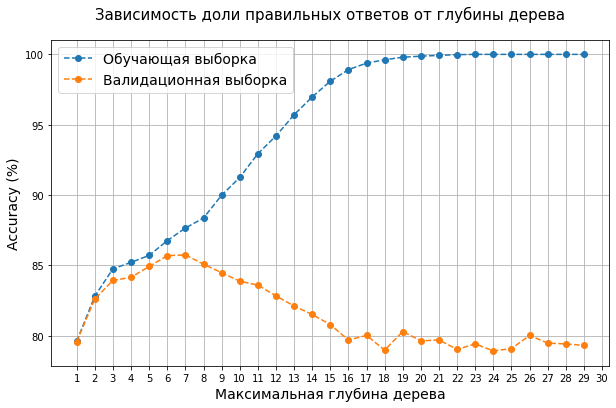

Алгоритм: DecisionTreeClassifier
Максимальная F1-мера: 0.60
Самая высокая точность: 85.75%
Самое удачное число деревьев: 0
Самая удачная максимальная глубина: 7


In [110]:
# переменные для сохранения наиболее удачных результатов
best_model_tree = None
best_result_tree = 0
best_depth = 0
best_f1 = 0
# списки для построения графика зависимости результата от глубины дерева
results_train = []
results_valid = []
depths = []
# перебор параметров, обучение и выбор лучшей модели:
for depth in range(1, 30):
    # обучение модели на тренировочной выборке:
    model_tree =  DecisionTreeClassifier(random_state=depth, max_depth=depth)
    model_tree.fit(x_train, y_train)
    # предсказания модели на обучающей выборке:
    predictions_train = model_tree.predict(x_train)
    # расчет accuracy на обучающей выборке:
    result_train = accuracy_score(y_train, predictions_train)
    results_train.append(result_train*100)
    # предсказания модели на валидационной выборке:
    predictions_valid = model_tree.predict(x_val)
    # расчет accuracy на валидационной выборке:
    result_valid = accuracy_score(y_val, predictions_valid)
    results_valid.append(result_valid*100)
    # расчет f1 на валидационной выборке:
    f1_val = f1_score(y_val, predictions_valid)
    depths.append(depth)
    if f1_val > best_f1:
        best_model_tree = model_tree
        best_result_tree = result_valid
        best_depth_tree = depth
        best_f1 = f1_val
# построение графика зависимости качества модели от максимальной глубины
pd.Series(index=depths, data=results_train).\
    plot(figsize=(10, 6), style='--o')
pd.Series(index=depths, data=results_valid).\
    plot(style='--o', grid=True)
plt.legend(['Обучающая выборка', 'Валидационная выборка', 'Тестовая выборка'], fontsize=14)
plt.title('Зависимость доли правильных ответов от глубины дерева', pad=20, size=15)
plt.xlabel('Максимальная глубина дерева', size=14)
plt.ylabel('Accuracy (%)', size=14)
plt.xticks(ticks=range(1, 31))
plt.show()
get_report(model_name='DecisionTreeClassifier', best_f1=best_f1,
           best_result=best_result_tree, best_depth=best_depth_tree,
           best_est=is_na)

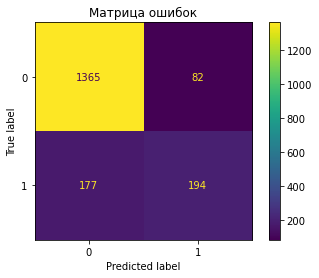

In [111]:
# матрица ошибок
predictions_valid = best_model_tree.predict(x_val)
disp = ConfusionMatrixDisplay.from_predictions(y_val, predictions_valid)
disp.ax_.set_title('Матрица ошибок')
plt.show()

Точность предсказаний получилась достаточно высокой (почти 86%), но так как у нас сильный дисбаланс классов и мы таргетируемся на меру F1, которая составила максимум 0.57, то дерево решений нельзя назвать удачным вариантом модели.

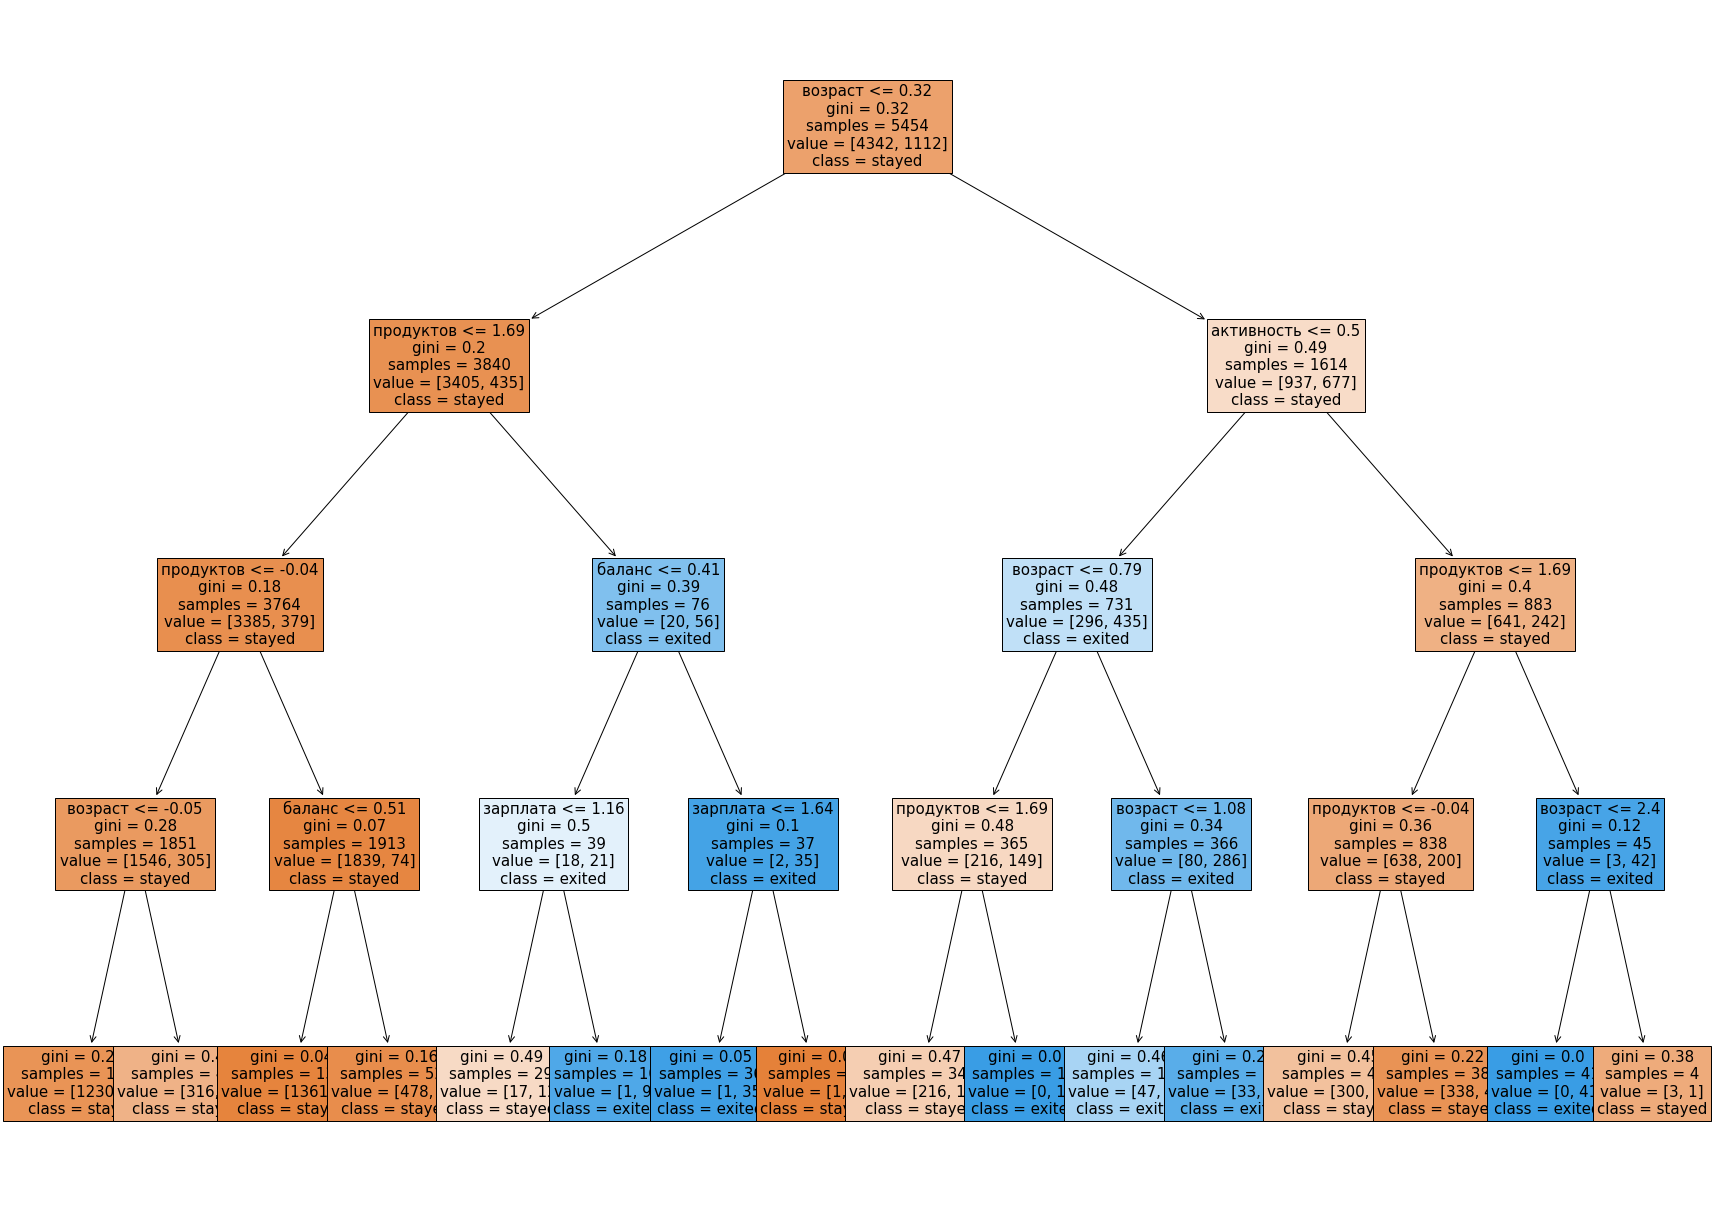

In [140]:
# визуализация дерева для максимальной глубины 4
# данная глубина для визуализации выбрана для удобства восприятия
feature_names = ['рейтинг', 'возраст', 'клиентcкий стаж', 'баланс',
                 'продуктов', 'кредитка', 'активность', 'зарплата',
                 'мужчина', 'немец', 'испанец']

clf = DecisionTreeClassifier(random_state=7, max_depth=4)
clf.fit(x_train, y_train)
plt.figure(figsize=(30,22))
tree.plot_tree(clf, feature_names=feature_names,
               class_names=['stayed', 'exited'],
               precision=2, fontsize=15, filled=True)
plt.show()

 Дерево решений, незевисимо от глубины, принимает решение преимущественно опираясь на значения следующих параметров: `возраст, количество продуктов, активность клиента, баланс, локация (проживает ли клиент в Германии)`.
 
При построении дерева с максимально удачной глубиной равной 7 к определяющим решение дерева параметрам на более глубоких уровнях добавятся: `клиентский стаж, зарплата, гендер, рейтинг, локация (проживает ли клиент в Испании)`.

#### RandomForestClassifier

Поиск наиболее удачных

- максимальной глубины (max_depth) в диапазоне от 1 до 12
- количества деревьев (n_estimators) в диапазоне от 3-х до 40 c шагом 3
для алгоритма случайного леса.

In [113]:
# списки с параметрами и результатами для построения графиков
results = []
estimators = []

# функция подбора гиперпараметров для случайного леса
# под x_test и y_test предполагается выборка для валидации или теста 
# (т.е. это не обязательно именно тестовая выборка)

def get_forest(x_train, y_train, x_test, y_test):
    
    # переменные для сохранения наиболее удачных результатов
    best_model_forest = None
    best_result_forest = 0
    best_f1 = 0
    best_est = 0
    best_depth = 0

    # перебор параметров, обучение и выбор лучшей модели
    for est in tqdm(range(3, 40, 3)):
        sub_results = []
        estimators.append(est)
        for depth in range (1, 12):
            model_forest = RandomForestClassifier(random_state=depth, 
                                              n_estimators=est, 
                                              max_depth=depth)
            # обучение модели на тренировочной выборке:
            model_forest.fit(x_train, y_train) 
            
            # предсказания модели на валидационной выборке:
            predictions_valid = model_forest.predict(x_test) 
            result = accuracy_score(y_test, predictions_valid)
            sub_results.append(result*100)
            
            # расчет f1 на валидационной выборке:
            f1_val = f1_score(y_val, predictions_valid)
            
            # сохранение параметров наилучшей модели
            if f1_val > best_f1:
                best_model_forest = model_forest
                best_result_forest = result
                best_f1 = f1_val
                best_est = est
                best_depth = depth
        results.append(sub_results)
    get_report(model_name='RandomForestClassifier', best_f1=best_f1,
           best_result=best_result_forest, best_depth=best_depth,
           best_est=best_est)
    # матрица ошибок
    print('Матрица ошибок:')
    predictions_valid = best_model_forest.predict(x_val)
    disp = ConfusionMatrixDisplay.from_predictions(y_val, predictions_valid)
    disp.ax_.set_title('Матрица ошибок')
    plt.show()
    return best_model_forest

100%|███████████████████████████████████████████| 13/13 [00:20<00:00,  1.58s/it]


Алгоритм: RandomForestClassifier
Максимальная F1-мера: 0.59
Самая высокая точность: 86.69%
Самое удачное число деревьев: 36
Самая удачная максимальная глубина: 11
Матрица ошибок:


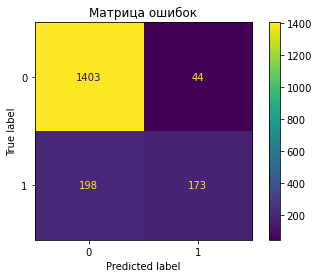

In [114]:
# обучение, валидация и поиск лучших гиперпараметров для алгоритма случайного леса
best_model_forest = get_forest(x_train, y_train, x_val, y_val)

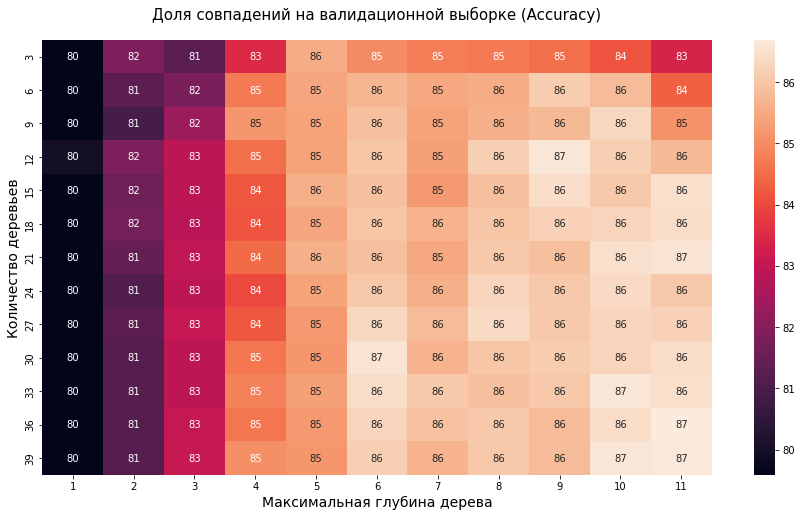

In [115]:
# тепловая карта по предсказаниям модели случайного леса с разными параметрами
pivot_random_forest = pd.DataFrame(index=range(3, 40, 3),
                                   columns=range(1, 12),
                                   data=results)
plt.figure(figsize=(15,8))
sns.heatmap(data=pivot_random_forest, annot=True)
plt.title("Доля совпадений на валидационной выборке (Accuracy)", pad=20, fontsize=15)
plt.xlabel('Максимальная глубина дерева', size=14)
plt.ylabel('Количество деревьев', size=14)
plt.show()

На хитмапе однозначно видно, что максимальный результат 86.5% совпадений на валидационной выборке достигается с глубиной 11 и количеством деревьев 39, но метрика F1 ниже минимального целевого значения

#### LogisticRegression

In [116]:
# перебор моделей логистической регрессией с разными алгоритмами (параметр solver)
# алгоритмы 'sag' и 'saga' не использовались, т.к. датасет небольшой
for i in ['lbfgs', 'liblinear', 'newton-cg']:
    model_log = LogisticRegression(random_state=1, solver=i, max_iter=1000) 
    model_log.fit(x_train, y_train)
    # предсказания модели на валидационной выборке
    predictions_valid = model_log.predict(x_val)
    best_result_regression = accuracy_score(y_val, predictions_valid)
    # расчет f1 на валидационной выборке:
    f1_val = f1_score(y_val, predictions_valid)
    print('solver:', i)
    get_report(model_name='LogisticRegression', best_f1=f1_val, 
               best_result=best_result_regression)
    print()

solver: lbfgs
Алгоритм: LogisticRegression
Максимальная F1-мера: 0.32
Самая высокая точность: 81.24%
Самое удачное число деревьев: 0
Самая удачная максимальная глубина: 0

solver: liblinear
Алгоритм: LogisticRegression
Максимальная F1-мера: 0.32
Самая высокая точность: 81.24%
Самое удачное число деревьев: 0
Самая удачная максимальная глубина: 0

solver: newton-cg
Алгоритм: LogisticRegression
Максимальная F1-мера: 0.32
Самая высокая точность: 81.24%
Самое удачное число деревьев: 0
Самая удачная максимальная глубина: 0



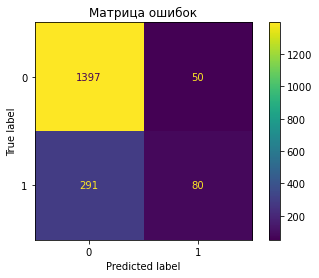

In [117]:
# матрица ошибок: т.к. все алгоритмы работают показали одинаковые метрики качества,
# то матрица построена по посднему результату
disp = ConfusionMatrixDisplay.from_predictions(y_val, predictions_valid)
disp.ax_.set_title('Матрица ошибок')
plt.show()

Все протестированные линейные модели, как и деревья, имеют точность более 80%, но очень низкую F1-меру.

## Проверка модели на адекватность

Т.к. в данных есть сильный дисбаланс классов, то результат наиболее удачной модели можно сравнить c предсказанием всем класса "0" (т.е. 'stayed', а не exited') - что значит, что все клиенты останутся, а не уйдут.

In [118]:
most_frequent_prediction = DummyClassifier(strategy='most_frequent')
most_frequent_prediction.fit(x_train, y_train)

result_valid = most_frequent_prediction.predict(x_val)
print('Точность при прогнозировании наиболее частого класса:')
print('- на валидационной выборке:', 
     accuracy_score(result_valid, y_val))
result_test = most_frequent_prediction.predict(x_test)
print('- на тестовой выборке:',
      accuracy_score(result_test, y_test))

Точность при прогнозировании наиболее частого класса:
- на валидационной выборке: 0.7959295929592959
- на тестовой выборке: 0.7960417811984607


Самая удачная модель случайного леса с результатом 0.8652 без учета дисбаланса классов лучше предсказывает результат (если сравнивать по accuracy), чем простейшая модель предсказания самого частого класса (равна доле самого распространенного класса 0.7959).

### Метрики  модели с дисбалансом

In [119]:
# матрица ошибок для лучшей модели на валидационной выборке
predicted_val = best_model_forest.predict(x_val)
conf_m = confusion_matrix(y_val, predicted_val)
print(f'False Positive: {conf_m[0][1]}')
print(f'False Negative: {conf_m[1][0]}')

False Positive: 44
False Negative: 198


В итоге модель "упустила" 206 клиентов, которые на самом деле ушли из банка, предсказав им, что они продолжат пользоваться услугами банка. Таким образом банк не смог бы предпринять меры по их сохранению.

Клиентов, которым модель предсказала уход, но они остались, очень немного - 39 человек и в данной задаче этот результат менее важен, чем результат выше (ложно-негативный).

In [120]:
# матрица ошибок для лучшей модели на тестовой выборке
predicted_test = best_model_forest.predict(x_test)
confusion_matrix(y_test, predicted_test)

array([[1407,   41],
       [ 216,  155]])

In [121]:
recall_val = recall_score(y_val, predicted_val)
recall_test = recall_score(y_test, predicted_test)
print(f'Полнота определения ухода клиентов на валидационной выборке: {recall_val}')
f'Полнота определения ухода клиентов на тестовой выборке: {recall_test}'

Полнота определения ухода клиентов на валидационной выборке: 0.46630727762803237


'Полнота определения ухода клиентов на тестовой выборке: 0.41778975741239893'

Для данной задачи наиболее удачной будет метрика полноты, т е насколько полноценно мы предскажем потенциальные потери банка и не упустим ли мы не лояльных клиентов, которые в последствии уйдут из банка.

Без учета дисбаланса классов мы успешно определяем только 44-46% тех, кого банк потеряе. Т е при использовании такой модели, на более чем половину (53-55%) реально нелояльных клиентов банк просто не обратит внимания и не предпримет никаких действий по их сохранению.

In [122]:
precision_val = precision_score(y_val, predicted_val)
precision_test = precision_score(y_test, predicted_test)
print(f'Точность определения ухода клиентов на валидационной выборке: {precision_val}')
f'Точность определения ухода клиентов на тестовой выборке: {precision_test}'

Точность определения ухода клиентов на валидационной выборке: 0.7972350230414746


'Точность определения ухода клиентов на тестовой выборке: 0.7908163265306123'

Метрика точности для данной задачи не является ключевой, но её может иметь смысл посчитать, чтобы понять, какая доля истинно лояльных клиентов окажется среди тех, кто по прогнозам модели собирается отказаться от услуг банка.

Например, если на сохранение нелояльных клиентов будут направлены такие меры, как предоставление им более выгодных условий/продуктов, чем лояльным клиентам (например, более выгодная ставка по вкладу/кредиту или любая подобная акция), то мы можем узнать, сколько клиентов потенциально могут получить эти более выгодные для себя условия реально не нуждаясь в них (т.е. которые согласились бы и на стандартные условия банка).

В данном случае истинно лояльными оказываются только 17-20% клиентов, которым модель предсказала уход.

In [123]:
f1_val = f1_score(y_val, predicted_val)
f1_test = f1_score(y_test, predicted_test)
print(f'F1-мера определения ухода клиентов на валидационной выборке: {f1_val}')
f'F1-мера определения ухода клиентов на тестовой выборке: {f1_test}'

F1-мера определения ухода клиентов на валидационной выборке: 0.5884353741496599


'F1-мера определения ухода клиентов на тестовой выборке: 0.54673721340388'

In [124]:
# предсказание вероятностей принадлежности к классу "1" на валидационной выборке
probabilities_valid = best_model_forest.predict_proba(x_val)
probabilities_one_valid = probabilities_valid[:, 1]
print(probabilities_one_valid[0:5]) 

[0.02159777 0.50192901 0.03306884 0.02414636 0.10162414]


Лучший порог = 0.32 | Точность = 0.611, Полнота = 0.639, F1 = 0.624506


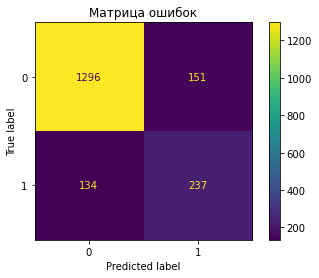

In [125]:
# перебор порогов для достижения максимального F1
best_f1 = 0
best_threshold = 0
p = []
r = []

for threshold in np.arange(0, 0.5, 0.01):
    predicted_val = probabilities_one_valid > threshold 
    f1_val = f1_score(y_val, predicted_val)
    if best_f1 < f1_val:
        best_f1 = f1_val
        best_threshold = threshold
        p.append(precision_score(y_val, predicted_val))
        r.append(recall_score(y_val, predicted_val))
predicted_val = probabilities_one_valid > best_threshold
precision = precision_score(y_val, predicted_val)
recall = recall_score(y_val, predicted_val)
print("Лучший порог = {:.2f} | Точность = {:.3f}, Полнота = {:.3f}, F1 = {:3f}"\
      .format(best_threshold, precision, recall, best_f1))
disp = ConfusionMatrixDisplay.from_predictions(y_val, predicted_val)
disp.ax_.set_title('Матрица ошибок')
plt.show()

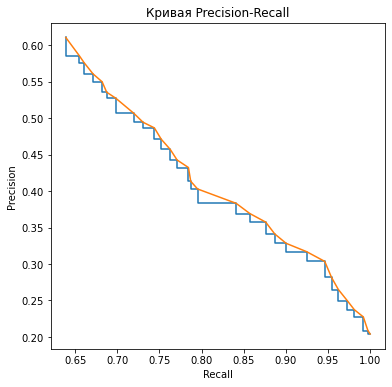

In [126]:
# кривая сбалансированности полноты и точноти
predicted_val = probabilities_one_valid > best_threshold 

plt.figure(figsize=(6, 6))
plt.step(r, p, where='post')
plt.plot(r, p)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Кривая Precision-Recall')
plt.show() 

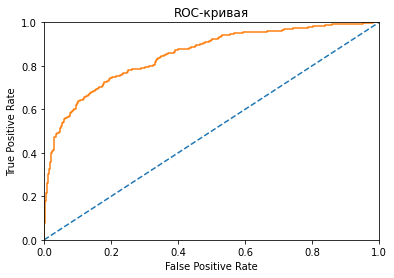

In [127]:
# кривая сбалансированности истинно-положительных и ложно-положительных предсказаний модели
fpr, tpr, thresholds = roc_curve(y_val, probabilities_one_valid) 

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')

plt.show()

In [128]:
# метрика AUC-ROC (площадь под кривой)
auc_roc = roc_auc_score(y_val, probabilities_one_valid)
auc_roc

0.8513273116420812

При максимизации F1-меры наиболее удачной получилась модель со следующими параметрами:

Алгоритм: RandomForestClassifier

Самое удачное число деревьев: 39

Самая удачная максимальная глубина: 11

Лучший порог = 0.31 

Точность = 0.617

Полнота = 0.604

F1 = 0.610354
    
Метрика F1 выше необходимого минимального таргета 0.59.

### Балансирование классов

Балансирование классов тремя способами: 
- пересэмплирование синтетического меньшинства (создание "искусственных" объектов миноритарного класса)
- уменьшение размерности объектов мажоритарного класса
- увеличение размерности (дублирование) объектов миноритарного класса.

*`upsampling` и `downsampling` изучались в курсе ЯП, а `smote` взят просто для разнообразия и в надежде наити более удачный способ*

#### SMOTE

In [129]:
smote = SMOTE(random_state=1000)
x_smote, y_smote = smote.fit_resample(x_train, y_train)

print(x_smote.shape)
print(y_smote.shape)

(8684, 11)
(8684,)


100%|███████████████████████████████████████████| 13/13 [00:30<00:00,  2.31s/it]

Алгоритм: RandomForestClassifier
Максимальная F1-мера: 0.60
Самая высокая точность: 82.78%
Самое удачное число деревьев: 18
Самая удачная максимальная глубина: 11
Матрица ошибок:


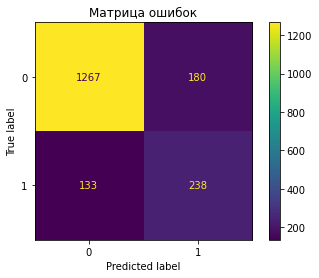

RandomForestClassifier(max_depth=11, n_estimators=18, random_state=11)

In [130]:
# подбор гиперпараметров для RF и измерение метрик
get_forest(x_smote, y_smote, x_val, y_val)

Предыдущая модель дерева решений без балансировки классов, но с изменением порога, давала более точные результаты.

#### downsampling

In [131]:
#  уменьшение размерности класса "0"
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=1)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=1)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=1)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(x_train, y_train, 0.2)
print(features_downsampled.shape, target_downsampled.shape)

(1980, 11) (1980,)


100%|███████████████████████████████████████████| 13/13 [00:15<00:00,  1.16s/it]


Алгоритм: RandomForestClassifier
Максимальная F1-мера: 0.58
Самая высокая точность: 76.18%
Самое удачное число деревьев: 27
Самая удачная максимальная глубина: 7
Матрица ошибок:


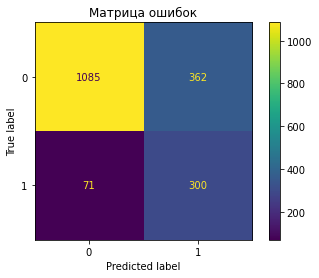

RandomForestClassifier(max_depth=7, n_estimators=27, random_state=7)

In [132]:
# подбор гиперпараметров для RF и измерение метрик
get_forest(features_downsampled, target_downsampled, x_val, y_val)

При балансировке классов уменьшением размерности мажоритарного класса баланс полноты и точности ниже таргета 0.56 < 0.59.

#### upsampling

In [133]:
#  увеличение размерности класса "1"

def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upnsampled, target_upsampled = shuffle(
    features_upsampled, target_upsampled, random_state=1)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(x_train, y_train, 4)
print(features_upsampled.shape, target_upsampled.shape)

(8790, 11) (8790,)


100%|███████████████████████████████████████████| 13/13 [00:28<00:00,  2.16s/it]


Алгоритм: RandomForestClassifier
Максимальная F1-мера: 0.38
Самая высокая точность: 53.25%
Самое удачное число деревьев: 15
Самая удачная максимальная глубина: 3
Матрица ошибок:


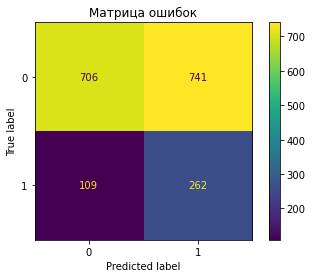

RandomForestClassifier(max_depth=3, n_estimators=15, random_state=3)

In [134]:
# подбор гиперпараметров для RF и измерение метрик
get_forest(features_upsampled, target_upsampled, x_val, y_val)

При балансировке классов уменьшением размерности мажоритарного класса баланс полноты и точности ниже таргета 0.38 < 0.59.

## Тестирование модели

Наиболее удачной моделю для последующей доработки я считаю модель случайного леса с определенными ранее гиперпарамтрами, несбалансированными классами и сниженным порогом для определения положительного целевого класса.

In [135]:
# объединение обучающей и валидационной выборки
x_train_full = pd.concat([x_train, x_val])
y_train_full = pd.concat([y_train, y_val])

# обучение модели RF с наилучшими параметрами на новой объединенной выборке
model = RandomForestClassifier(random_state=2, 
                               n_estimators=39, 
                               max_depth=11)
model.fit(x_train_full, y_train_full)
predictions_test = model.predict(x_test)

# наилучший порог
threshold = 0.31

# предсказание вероятностей на тестовой выборке
predicted = model.predict_proba(x_test)

# выбираем массив с вероятностями только для класса "1" и сравниваем с порогом
# получаем обновленные предсказания с пониженным порогом
predictions_test = predicted[:, 1] > threshold 
predictions_test

array([False, False, False, ..., False, False, False])

Метрики на тестовой выборке самой удачной модели
Доля верных ответов: 83.18%
F1-мера: 0.60
Доля истинно положительных ответов среди всех положительных: 58.23%
Доля предсказанных положительных среди всех истинно положительных: 61.99%
Баланс полноты положительных и отрицательных классов: 0.75


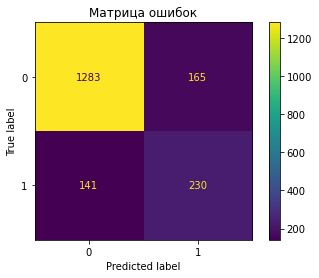

In [136]:
# метрики на финальной модели
print('Метрики на тестовой выборке самой удачной модели')
accuracy = accuracy_score(y_test, predictions_test)
print("Доля верных ответов: {:.2%}".format(accuracy))
f1 = f1_score(y_test, predictions_test)
print("F1-мера: {:.2f}".format(f1))

precision = precision_score(y_test, predictions_test)
recall = recall_score(y_test, predictions_test)

# метрики точность, полнота, AUC-ROC
auc_roc = roc_auc_score(y_test, predictions_test)
print('Доля истинно положительных ответов среди всех положительных: {:.2%}'\
      .format(precision))
print('Доля предсказанных положительных среди всех истинно положительных: {:.2%}'
      .format(recall))
print('Баланс полноты положительных и отрицательных классов: {:.2f}'.format(auc_roc))

disp = ConfusionMatrixDisplay.from_predictions(y_test, predictions_test)
disp.ax_.set_title('Матрица ошибок')
plt.show()

Таким образом, наилучшие результаты показала модель с алгоритмом случайного леса без балансировки классов с пониженным порогом чувствительности к миноритарному классу.

## Выводы

Целью данной работы было на основании исторических данных о поведении клиентов и расторжении договоров с банком обучить модель, предсказывающую уход клиента из банка в ближайшее время со значением `F1-меры` не менее `0.59`.

В процессе работы решались следующие задачи:

1. Провести предобработку данных
2. Подготовить данные для обучения модели
3. Определить способ оценки эффективности моделей
4. Подборать оптимальную модель для решения задачи классификации
4. Подборать наилучшие гиперпараметры
5. Протестировать модель на валидационной и тестовой выборках
6. Проверить наиболее успешную модель на адекватность

При предобработке данных были решены задачи:
- обработки пропусков в данных
- оптимизации типов данных
- очищения от неинтерпретируемых данных

Для подготовки данных к обучению модели и анализа результатов были использованы следующие методы:
- перекодирование данных
- группировка данных
- визуализации данных
- интерпретация взаимозависимостей
- работа с дисбалансом классов

_________________

При первичном анализе данных были выявлены следующие особенности:

Рзные признаки оказывают разную степень влияния на вероятность потери клиента.

В Германии банк потерял каждого третьего клиента (32%) за последний цикл.

Женщины прекращают отношения с банком чаще мужчин (25% и 16% соответственно).

Наличие кредитной карты на отток клиентов никак не влияет.

Активные клиенты (15%) ожидаемо реже уходят из банка, чем неактивные клиенты (27%).

Клиенты, пользующиеся 4-мя продуктами банка (1% пользователей) покинули банк абсолютно все. Также 83% пользователей суммарно 3-х продуктов банка перестали быть его клиентами.

Самыми стабильными оказались обладатели 2-х продуктов банка - более 90% из них остались клиентами банка.

____________________________

Учитывая специфику задачи, способом оценки эффективности моделей были выбраны:
1. `F1-мера` - среднее гармоническое полноты и точности предсказаний модели
2. `AUC-ROC` - баланс полносты положительных и отрицательных классов

Также для оценки точности моделей использовались дополнительные метрики:
- `Accuracy` - общая доля верных ответов (%)
- `Precision` - доля истинно положительных ответов среди всех положительных (точность)
- `Recall` - доля предсказанных положительных среди всех истинно положительных (полнота)
___________________________

Самую высокую F1-меру при применении на тестовой выборке показал алгоритм Случайного Леса (`RandomForestClassifier`) с определенным набором параметров (число деревьев: 39, максимальная глубина дерева: 11, порог положительных значений: 0.31):
- F1-мера: `0.65`
- доля верных ответов: `85.49%`
- доля истинно положительных ответов среди всех положительных: `63.97%`
- доля предсказанных положительных среди всех истинно положительных: `66.04%`
- баланс полноты положительных и отрицательных классов: `0.78`

Таким образом, точность и полнота предсказаний были максимально возможно сбалансированы.

Банк может рассчитывать на точное определение `66%` потенциальных потерь клиентов и своевременно предпринимать для этого необходимые меры, повышая таким образом эффективность своей работы. При этом доля некоректно определенных лояльных клиентов сведена к минимуму и составляет `36%`.

Модель корректно определила лояльность клиентов для `85%` клиентов из тестовой выборки.

__________________

Также были протестированы модели на основе Дерева Решений (DecisionTreeClassifier) и Логистической регрессии (LogisticRegression), показавшие более низкую прогнозную способность.

Дисбаланс классов обрабатывался тремя способами:
- создание "искусственных" объектов миноритарного класса
- уменьшение размерности объектов мажоритарного класса
- увеличение размерности (дублирование) объектов миноритарного класа, 
но наибольшую эффективность показало снижение порога чувствительности к миноритарному классу ("нелояльные/ушедшие" клиенты).

Проверка результирующей модели проводилась путем сравнения точности ее предсказаний с простейшими моделями, которые предполагают принадлежность всех наблюдей к одному превалирующему классу ("клиент остался").
______________________________

По результатам визуализации алгоритма можно сказать, что наибольшую роль при определении тарифного плана играют
- возраст клиента
- количество продуктов
- активность клиента
- баланс
- локация (проживает ли клиент в Германии).

К менее значимым параметрам относятся: 
- клиентский стаж
- предполагаемая зарплата
- гендер
- кредитный рейтинг
- локация (проживает ли клиент в Испании).